In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('./input_data/housing-prices-dataset/train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

### Phần 1:

1. Input: <> SalePrice
2. Output: SalePrice
3. Type of variable:
    3.1 Predictor: <> SalePrice
    3.2 Target: SalePrice
4. Data type
    4.1 Charactor/String
    4.2 Numeric
5. Variable Catefory


In [5]:
numbers = [f for f in df.columns if df.dtypes[f] != 'object']

In [6]:
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [7]:
objects = [f for f in df.columns if df.dtypes[f] == 'object']

In [8]:
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

5. Variable
* 5.1 Categorical
* 5.2 Continuos

In [9]:
# Categorical:
i=1
for obj in objects:
    print(i, '/', len(df[obj].unique()),':', df[obj].unique())
    i=i+1

1 / 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / 2 : ['Pave' 'Grvl']
3 / 3 : [nan 'Grvl' 'Pave']
4 / 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / 2 : ['AllPub' 'NoSeWa']
7 / 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / 3 : ['Gtl' 'Mod' 'Sev']
9 / 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / 6 : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
15 / 8 : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
16 / 15 : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' '

In [10]:
# Categorical & continueous:
i=1
for obj in numbers:
    print(i, '/', obj,  len(df[obj].unique()),':',
          df[obj].unique() if len(df[obj].unique()) <150 else '')
    i=i+1

1 / Id 1460 : 
2 / MSSubClass 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 1073 : 
5 / OverallQual 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1

### Phần 2: Phân tích đơn biến

In [11]:
%matplotlib inline

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
features = ['LotArea','OverallQual','YearBuilt','1stFlrSF', '2ndFlrSF',
            'GrLivArea','FullBath','BedroomAbvGr','TotRmsAbvGrd',
           'GarageArea','TotalBsmtSF']

In [14]:
# Categorical & continueous:
i=1
for obj in features:
    print(i, '/', obj,  len(df[obj].unique()),':',
          df[obj].unique() if len(df[obj].unique()) <150 else '')
    i=i+1

1 / LotArea 1073 : 
2 / OverallQual 10 : [ 7  6  8  5  9  4 10  3  1  2]
3 / YearBuilt 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
4 / 1stFlrSF 753 : 
5 / 2ndFlrSF 417 : 
6 / GrLivArea 861 : 
7 / FullBath 4 : [2 1 3 0]
8 / BedroomAbvGr 8 : [3 4 1 2 0 5 6 8]
9 / TotRmsAbvGrd 12 : [ 8  6  7  9  5 11  4 10 12  3  2 14]
10 / GarageArea 441 : 
11 / TotalBsmtSF 721 : 


#### Continuous variable


* LotArea 
* 1stFlrSF 
* 2ndFlrSF 
* YearBuilt 
* GrLivArea 
* GarageArea 
* TotalBsmtSF 



In [15]:
def uniariate_analysis_continuous_variable(df, feature):
    print('Describe: ')
    print(feature.describe(include='all'))
    print('Mode: ', feature.mode())
    print('Range: ', feature.values.ptp())
    print('IQR: ', scipy.stats.iqr(feature))
    print('Var: ', feature.var())
    print('Std: ', feature.std())
    print('Skew: ', feature.skew())
    print('Kurtosis: ', feature.kurtosis())
    

In [16]:
def check_outlier(df, feature):
    plt.boxplot(feature)
    plt.show()
    Q1= np.percentile(feature, 25)
    Q3= np.percentile(feature, 75)
    n_O_upper = df[feature > (Q3 + 1.5*scipy.stats.iqr(feature))].shape[0]
    print('Number of upper outlier:', n_O_upper)
    n_O_lower = df[feature < (Q1 - 1.5*scipy.stats.iqr(feature))].shape[0]
    print('Number of lower outlier:', n_O_lower)
    # Percentage of outliers
    outlier_per = (n_O_lower + n_O_upper)/df.shape[0]
    print('Percentage of outliers:', outlier_per)
    return Q1, Q3, n_O_upper, n_O_lower, outlier_per
    

In [17]:
def uniariate_visualization_analysis_continuous_variable(feature):
    # historgram
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(feature, kde=True, stat='density')
    plt.subplot(1,2,2)
    plt.hist(feature)
    plt.show()
    
    #boxplot
    plt.figure(figsize=(4,5))
    plt.boxplot(feature)
    plt.show()


In [18]:
uniariate_analysis_continuous_variable(df,df['LotArea'])

Describe: 
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Mode:  0    7200
Name: LotArea, dtype: int64
Range:  213945
IQR:  4048.0
Var:  99625649.65034176
Std:  9981.26493237915
Skew:  12.207687851233496
Kurtosis:  203.24327101886033


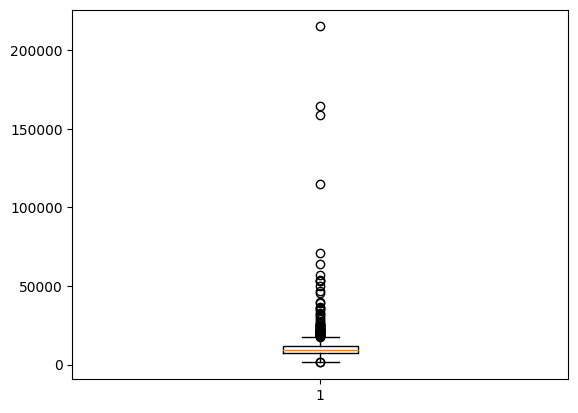

Number of upper outlier: 67
Number of lower outlier: 2
Percentage of outliers: 0.04726027397260274


In [19]:
Q1_LotArea, Q3_LotArea, n_O_upper_LotArea, n_O_lower_LotArea, \
outlier_per_LotArea, = check_outlier(df,df['LotArea'])

In [20]:
outlier_per_LotArea*100

4.726027397260274

In [21]:
# Có ~4.7% dữ liệu age có outlier
# Xem xét loại bỏ outlier

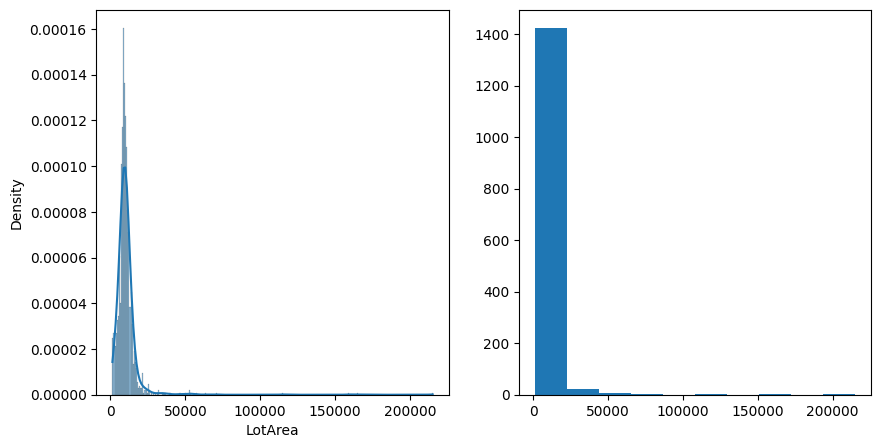

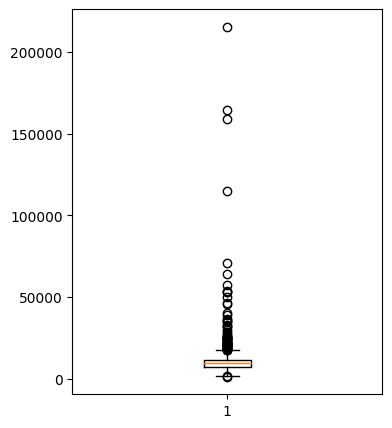

In [22]:
uniariate_visualization_analysis_continuous_variable(df['LotArea'])

In [23]:
# GarageArea
uniariate_analysis_continuous_variable(df,df['GarageArea'])

Describe: 
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
Mode:  0    0
Name: GarageArea, dtype: int64
Range:  1418
IQR:  241.5
Var:  45712.51022890514
Std:  213.80484145338042
Skew:  0.17998090674623907
Kurtosis:  0.9170672022708684


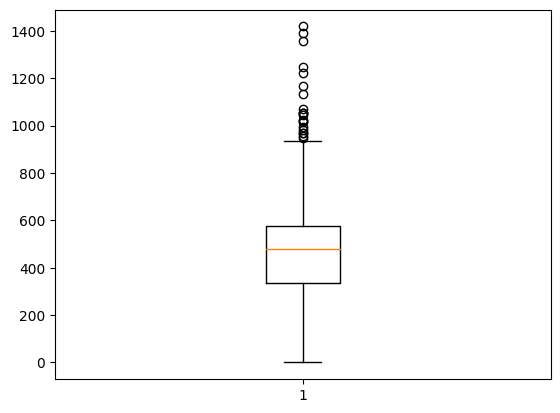

Number of upper outlier: 21
Number of lower outlier: 0
Percentage of outliers: 0.014383561643835616


In [24]:
Q1_GarageArea, Q3_GarageArea, n_O_upper_GarageArea, n_O_lower_GarageArea, \
outlier_per_GarageArea = check_outlier(df,df['GarageArea'])

In [25]:
outlier_per_GarageArea*100

1.4383561643835616

In [26]:
# Có ~1.43% dữ liệu age có outlier
# Xem xét loại bỏ outlier

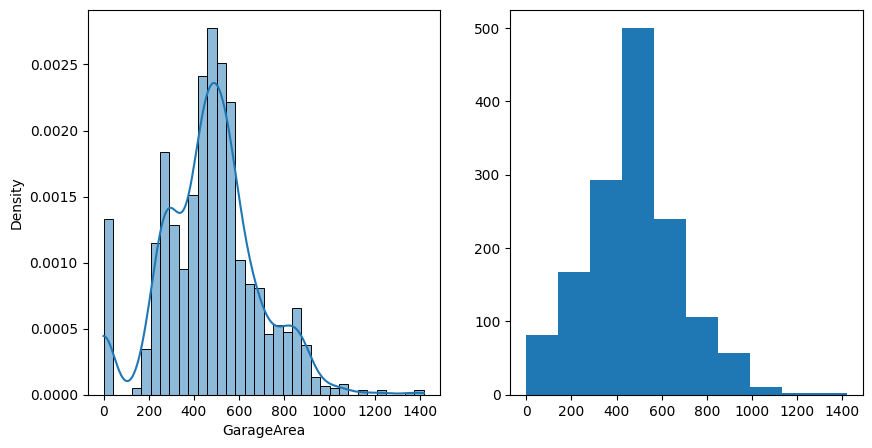

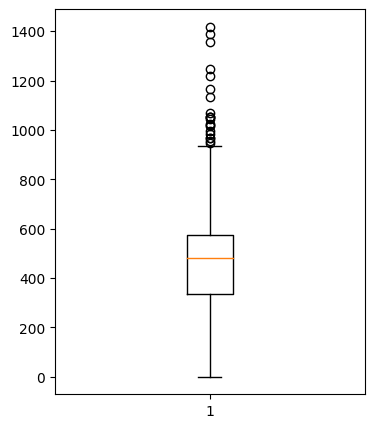

In [27]:
uniariate_visualization_analysis_continuous_variable(df['GarageArea'])

In [28]:
# OverallQual
uniariate_analysis_continuous_variable(df,df['OverallQual'])

Describe: 
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
Mode:  0    5
Name: OverallQual, dtype: int64
Range:  9
IQR:  2.0
Var:  1.9126794482991725
Std:  1.3829965467415934
Skew:  0.2169439277628693
Kurtosis:  0.09629277835615113


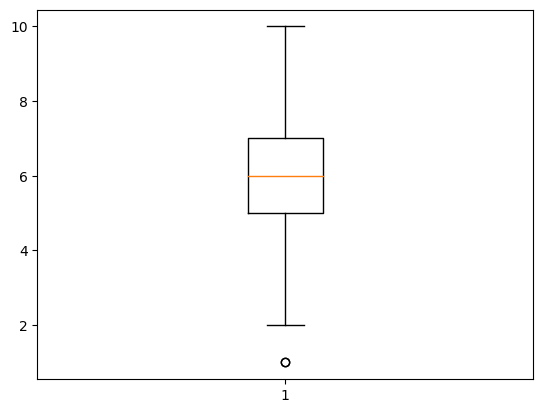

Number of upper outlier: 0
Number of lower outlier: 2
Percentage of outliers: 0.0013698630136986301


In [29]:
Q1_OverallQual, Q3_OverallQual, n_O_upper_OverallQual, n_O_lower_OverallQual, \
outlier_per_OverallQual, = check_outlier(df,df['OverallQual'])

In [30]:
outlier_per_OverallQual*100

0.136986301369863

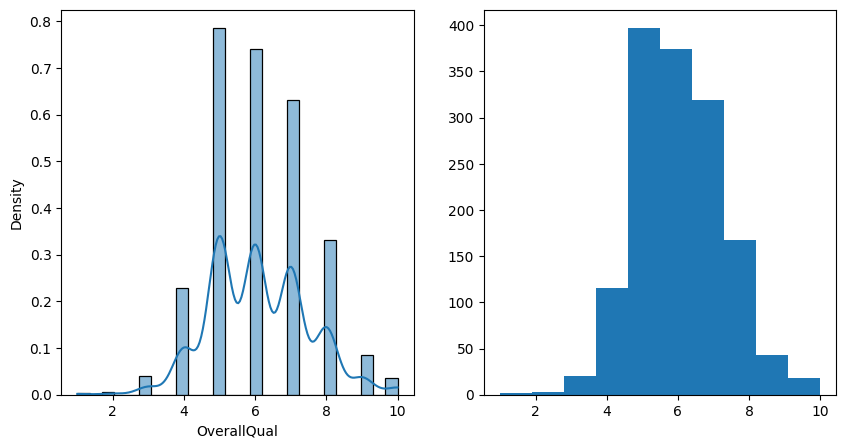

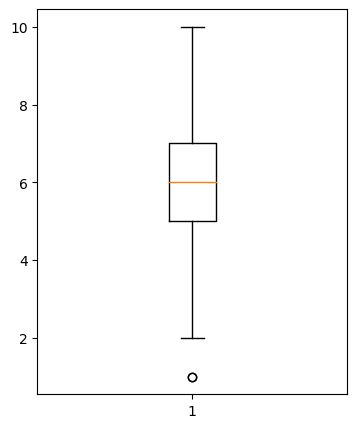

In [31]:
uniariate_visualization_analysis_continuous_variable(df['OverallQual'])

In [32]:
# FullBath
uniariate_analysis_continuous_variable(df,df['FullBath'])

Describe: 
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
Mode:  0    2
Name: FullBath, dtype: int64
Range:  3
IQR:  1.0
Var:  0.30350822011698764
Std:  0.5509158012954317
Skew:  0.036561558402727165
Kurtosis:  -0.8570428212743262


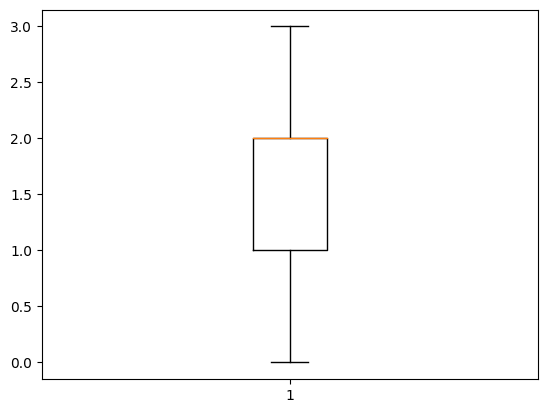

Number of upper outlier: 0
Number of lower outlier: 0
Percentage of outliers: 0.0


In [33]:
Q1_FullBath, Q3_FullBath, n_O_upper_FullBath, n_O_lower_FullBath, \
outlier_per_FullBath, = check_outlier(df,df['FullBath'])

In [34]:
outlier_per_FullBath*100

0.0

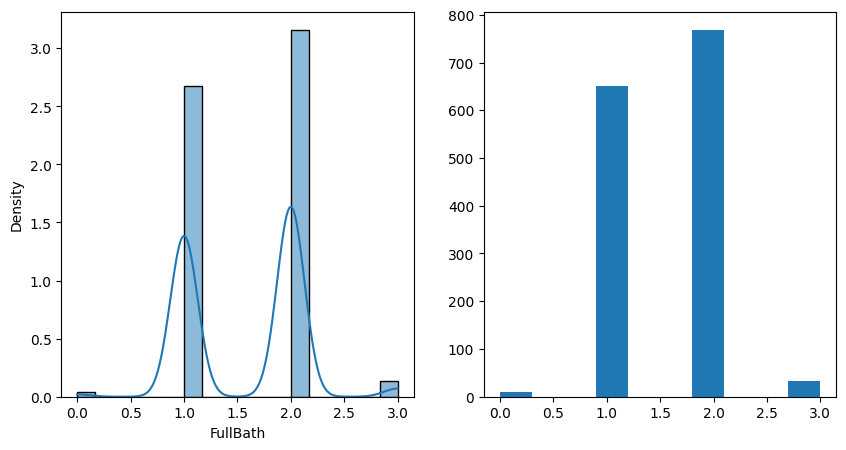

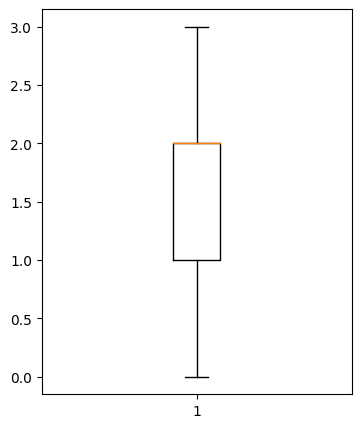

In [35]:
uniariate_visualization_analysis_continuous_variable(df['FullBath'])

In [36]:
# BedroomAbvGr
uniariate_analysis_continuous_variable(df,df['BedroomAbvGr'])

Describe: 
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
Mode:  0    3
Name: BedroomAbvGr, dtype: int64
Range:  8
IQR:  1.0
Var:  0.6654938173077826
Std:  0.8157780441442284
Skew:  0.21179009627507137
Kurtosis:  2.230874582191236


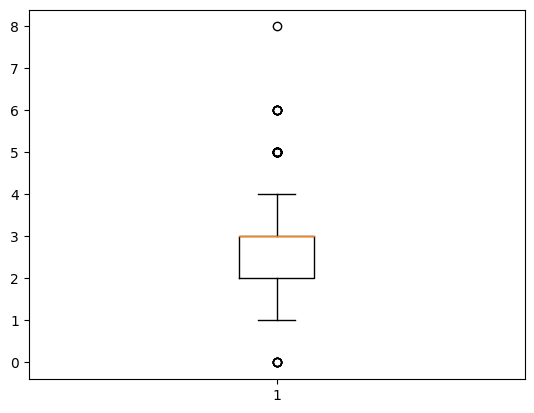

Number of upper outlier: 29
Number of lower outlier: 6
Percentage of outliers: 0.023972602739726026


In [37]:
Q1_BedroomAbvGr, Q3_BedroomAbvGr, n_O_upper_BedroomAbvGr, n_O_lower_BedroomAbvGr, \
outlier_per_BedroomAbvGr, = check_outlier(df,df['BedroomAbvGr'])

In [38]:
outlier_per_BedroomAbvGr*100

2.3972602739726026

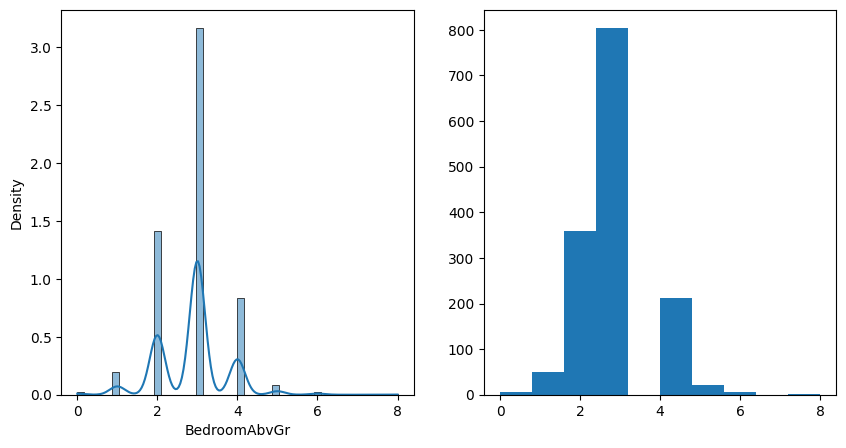

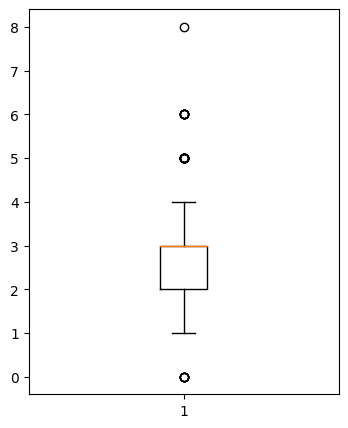

In [39]:
uniariate_visualization_analysis_continuous_variable(df['BedroomAbvGr'])

In [40]:
# TotRmsAbvGrd
uniariate_analysis_continuous_variable(df,df['TotRmsAbvGrd'])

Describe: 
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
Mode:  0    6
Name: TotRmsAbvGrd, dtype: int64
Range:  12
IQR:  2.0
Var:  2.641903349075647
Std:  1.6253932905840505
Skew:  0.6763408364355531
Kurtosis:  0.8807615657189474


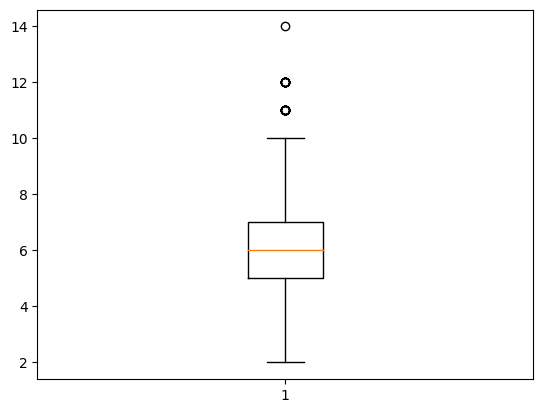

Number of upper outlier: 30
Number of lower outlier: 0
Percentage of outliers: 0.02054794520547945


In [41]:
Q1_TotRmsAbvGrd, Q3_TotRmsAbvGrd, n_O_upper_TotRmsAbvGrd, n_O_lower_TotRmsAbvGrd, \
outlier_per_TotRmsAbvGrd = check_outlier(df,df['TotRmsAbvGrd'])

In [42]:
outlier_per_TotRmsAbvGrd*100

2.054794520547945

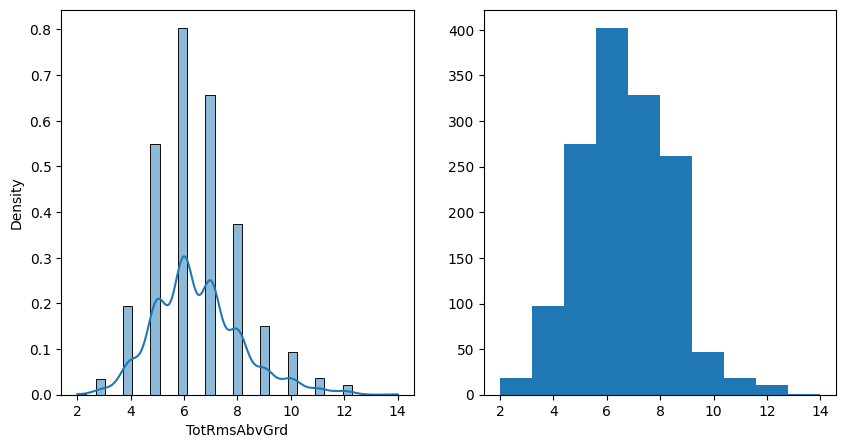

In [43]:
uniariate_visualization_analysis_continuous_variable(df['TotRmsAbvGrd'])

In [44]:
# TotalBsmtSF
uniariate_analysis_continuous_variable(df,df['TotalBsmtSF'])

Describe: 
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
Mode:  0    0
Name: TotalBsmtSF, dtype: int64
Range:  6110
IQR:  502.5
Var:  192462.36170908954
Std:  438.7053244594708
Skew:  1.5242545490627664
Kurtosis:  13.250483281984796


In [45]:
Q1_TotalBsmtSF, Q3_TotalBsmtSF, n_O_upper_TotalBsmtSF, n_O_lower_TotalBsmtSF, \
outlier_per_TotalBsmtSF = check_outlier(df,df['TotalBsmtSF'])

Number of upper outlier: 24
Number of lower outlier: 37
Percentage of outliers: 0.04178082191780822


In [46]:
outlier_per_TotalBsmtSF*100

4.178082191780822

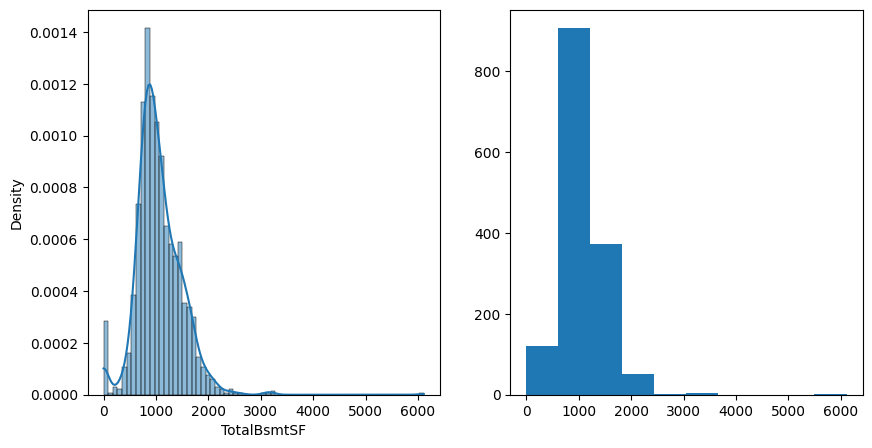

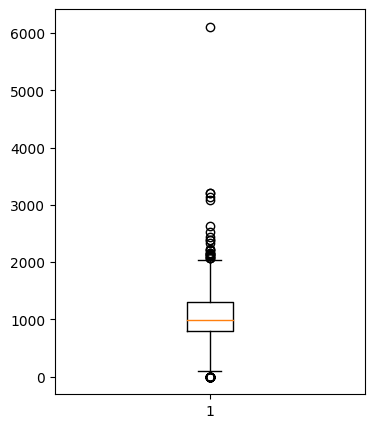

In [47]:
uniariate_visualization_analysis_continuous_variable(df['TotalBsmtSF'])

### 3. Phân tích 2 biến

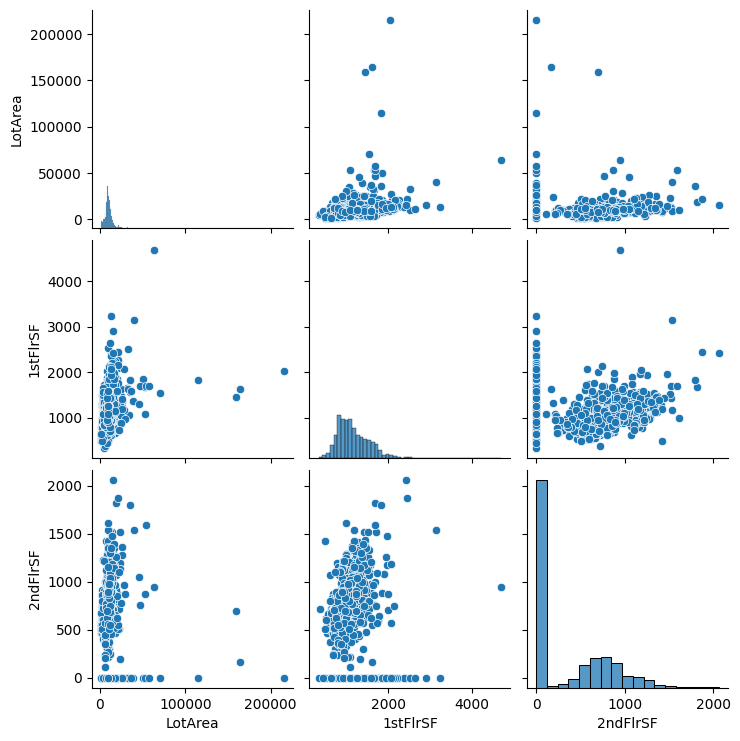

In [48]:
# Continuous & Continuous
sns.pairplot(df[['LotArea','1stFlrSF','2ndFlrSF']])
plt.show()

In [49]:
# Không quan hệ tuyến tính
df[['LotArea','1stFlrSF','2ndFlrSF']].corr()

LotArea  1stFlrSF  2ndFlrSF
LotArea   1.000000  0.299475  0.050986
1stFlrSF  0.299475  1.000000 -0.202646
2ndFlrSF  0.050986 -0.202646  1.000000

In [50]:
# Categorical & Categorical

In [51]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [52]:
def categorical_categorical(feature1, feature2):
    # Contigency table
    table_FB = pd.crosstab(feature1, feature2)
    print(table_FB)
    table_FB.plot(kind='bar', stacked = True)
    plt.show()
    # Chi-Square Test
    stat, p, dof, expected = chi2_contingency(table_FB)
    print('dof=%d' %dof)
    print('p=', p)
    # interoret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    # interpret p-value
    alpha = 1.0 - prob
    print('probability=%.3f, p=%.3f' %(alpha,p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        

BedroomAbvGr  0   1    2    3    4   5  6  8
FullBath                                    
0             5   2    2    0    0   0  0  0
1             1  42  213  352   37   5  0  0
2             0   6  143  443  156  12  7  1
3             0   0    0    9   20   4  0  0


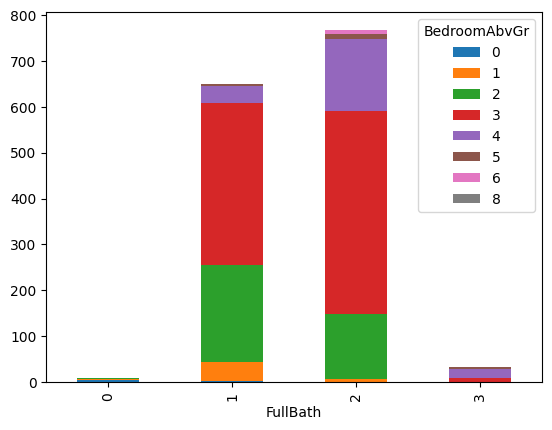

dof=21
p= 9.022959522651409e-177
probability=0.050, p=0.000
Dependent (reject H0)


In [53]:
# 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
# Contigency table: H0: 'FullBath', 'BedroomAbvGr' independent
categorical_categorical(df['FullBath'],df['BedroomAbvGr'])

In [54]:
categorical_categorical(df['FullBath'],df['TotRmsAbvGrd'])

TotRmsAbvGrd  2   3   4    5    6    7    8   9   10  11  12  14
FullBath                                                        
0              0   1   4    1    2    1    0   0   0   0   0   0
1              1  16  79  210  226   80   29   8   1   0   0   0
2              0   0  14   63  174  245  154  61  39  10   7   1
3              0   0   0    1    0    3    4   6   7   8   4   0


dof=33
p= 8.398586715893026e-125
probability=0.050, p=0.000
Dependent (reject H0)


In [55]:
categorical_categorical(df['BedroomAbvGr'],df['TotRmsAbvGrd'])

TotRmsAbvGrd  2   3   4    5    6    7   8   9   10  11  12  14
BedroomAbvGr                                                   
0              0   1   2    2    1    0   0   0   0   0   0   0
1              1  14  18    5    5    4   2   1   0   0   0   0
2              0   2  73  145   99   30   5   0   2   2   0   0
3              0   0   3  122  289  252  97  26  10   3   2   0
4              0   0   1    1    8   43  78  44  23  11   4   0
5              0   0   0    0    0    0   5   3   8   2   3   0
6              0   0   0    0    0    0   0   1   4   0   2   0
8              0   0   0    0    0    0   0   0   0   0   0   1


dof=77
p= 0.0
probability=0.050, p=0.000
Dependent (reject H0)


In [56]:
# Categorical & continuous

In [57]:
# 'FullBath' có bị ảnh hưởng bởi 'LotArea'
df_sub = df[['FullBath','LotArea']]
df_sub.head()

FullBath  LotArea
0         2     8450
1         2     9600
2         2    11250
3         1     9550
4         2    14260

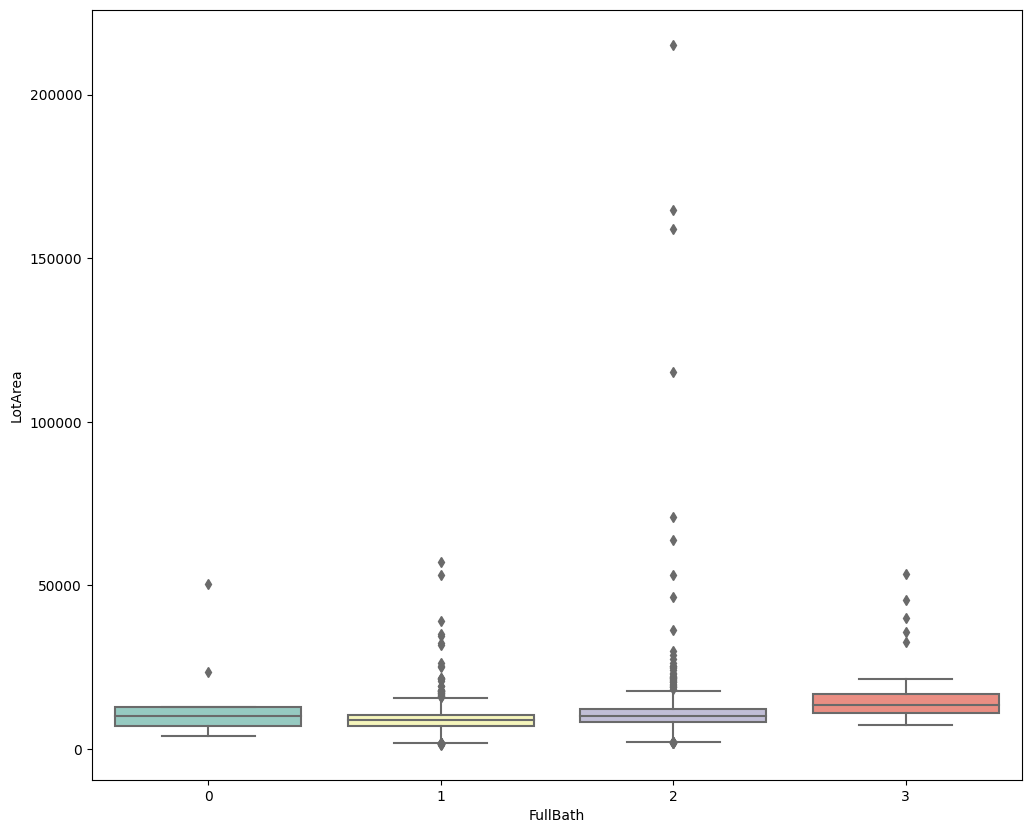

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x="FullBath", y="LotArea", data=df_sub, palette="Set3")
plt.show()

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
model = ols('LotArea ~ C(FullBath)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F        PR(>F)
C(FullBath)  3.332090e+09     3.0  11.386809  2.207543e-07
Residual     1.420217e+11  1456.0        NaN           NaN

* Giải thích: P-value thu được tù phân tích ANOVA cho LotArea và FullBath phối hợp có ý nghĩa thống kê (p<0.05)
* Kết luận: LotArea ảnh hưởng đáng kể đến FullBath

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Turkey HSD)
m_comp = pairwise_tukeyhsd(endog=df_sub['LotArea'],
                          groups=df_sub['FullBath'],
                          alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     0      1 -5695.6583 0.3145 -14221.4079  2830.0913  False
     0      2 -3587.0109 0.6999 -12103.8107   4929.789  False
     0      3  2477.0404 0.9095  -7075.3974 12029.4782  False
     1      2  2108.6474 0.0004    754.8034  3462.4914   True
     1      3  8172.6987    0.0   3639.9202 12705.4772   True
     2      3  6064.0513 0.0032   1548.1288 10579.9737   True
-------------------------------------------------------------


* Các kết quả trên từ Turkey HSD cho thấy 0-1, 0-2, 0-3: chấp nhận H0, các so sánh cặp khác về phòng bác bỏ H0 và chỉ ra sự khác biệt đáng kể về mặt thống kê.

#### 4. XỬ lý dữ liệu trùng, thiếu



In [62]:
df_now = df[['LotArea','OverallQual','YearBuilt','1stFlrSF', '2ndFlrSF',
            'GrLivArea','FullBath','BedroomAbvGr','TotRmsAbvGrd',
           'GarageArea','TotalBsmtSF']]

In [63]:
# Kiểm tra dữ liệu thiếu
df_now.isnull().sum()
# => Không có dữ liệu thiếu

LotArea         0
OverallQual     0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
TotalBsmtSF     0
dtype: int64

In [64]:
# Phát hiện dữ liệu trùng
df_now.duplicated().sum()

8

In [65]:
# Trước khi xóa dữ liệu trùng
df_now.shape

(1460, 11)

In [66]:
df_now = df_now.drop_duplicates()
df_now.shape

(1452, 11)

### 5. Phát hiện và xử lý ngoại lệ

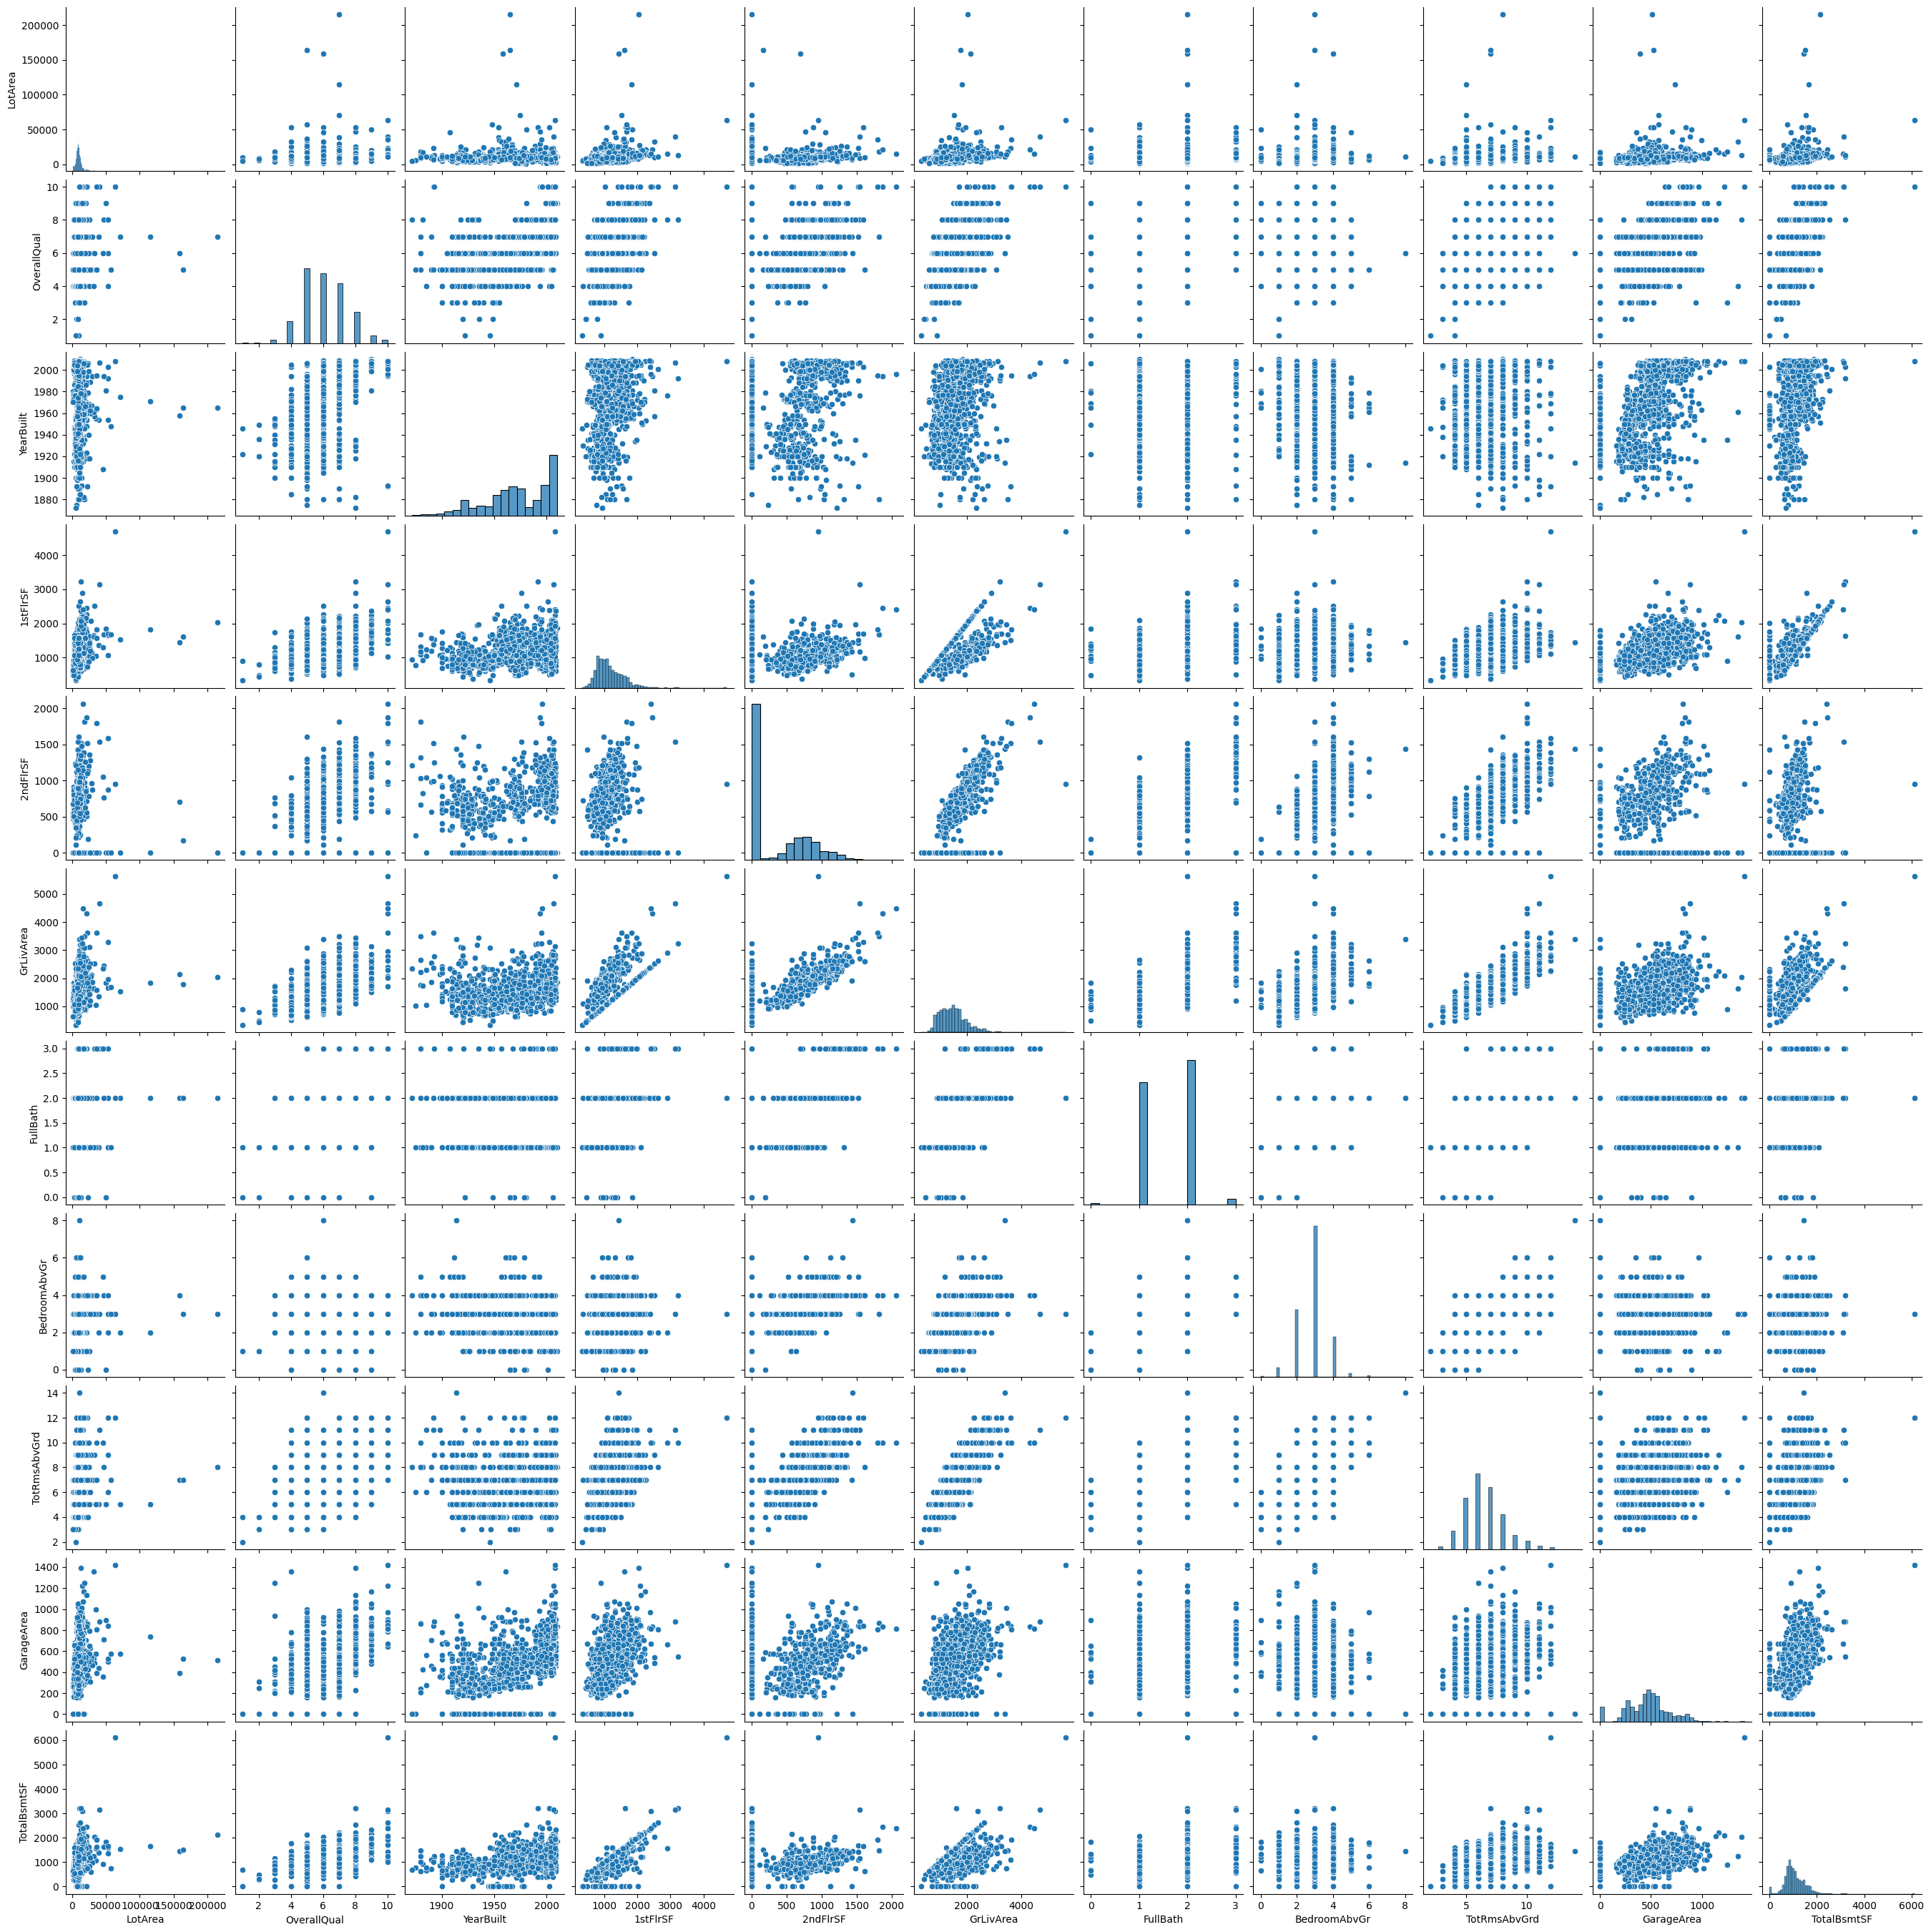

In [67]:
sns.pairplot(df[features])
plt.show()

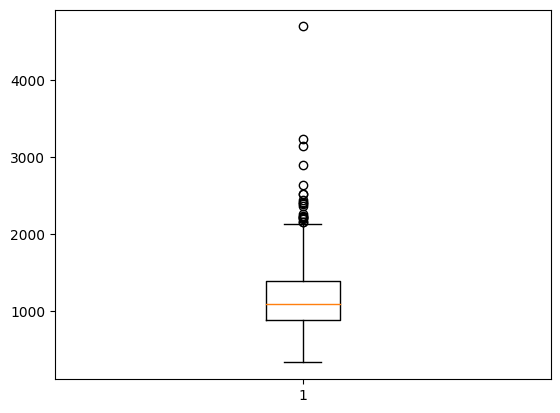

Number of upper outlier: 20
Number of lower outlier: 0
Percentage of outliers: 0.013774104683195593


In [68]:
Q1_1stFlrSF, Q3_1stFlrSF, n_O_upper_1stFlrSF, n_O_lower_1stFlrSF, \
outlier_per_1stFlrSF = check_outlier(df_now,df_now['1stFlrSF'])

In [69]:
Q1_2ndFlrSF, Q3_2ndFlrSF, n_O_upper_2ndFlrSF, n_O_lower_2ndFlrSF, \
outlier_per_2ndFlrSF = check_outlier(df_now,df_now['2ndFlrSF'])

Number of upper outlier: 2
Number of lower outlier: 0
Percentage of outliers: 0.0013774104683195593


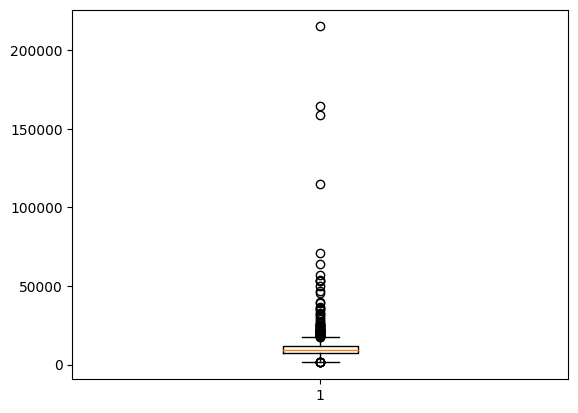

Number of upper outlier: 68
Number of lower outlier: 6
Percentage of outliers: 0.05096418732782369


In [70]:
Q1_LotArea, Q3_LotArea, n_O_upper_LotArea, n_O_lower_LotArea, \
outlier_per_LotArea, = check_outlier(df_now,df_now['LotArea'])

In [71]:
(outlier_per_1stFlrSF+outlier_per_2ndFlrSF+outlier_per_LotArea)*100

6.6115702479338845

* Có thể drop outlier của 1stFlrSF, 2ndFlrSF, LotArea: vì tổng số outlier là 6.6% dữ liệu
* Cũng có thể không cần drop thay vào đó khi áp dụng Machine Learning thì dùng thuật toán Decision Tree/ Random Forest